# 机器学习Lab1: 手写体识别
    - 姓名：王茂增
    - 学号：2113972
    - 代码：https://github.com/mzwangg/MachineLearning

## 实验要求
题目：基于KNN 的手写数字识别 实验条件：给定semeion手写数字数据集，给定kNN分类算法 实验要求：

1. 基本要求：编程实现kNN算法,要求使用留一法,求得在给出不同k值（1,3,5）情况下,kNN算法对⼿写数字的识别精度.	

2. 中级要求：与机器学习包中的kNN分类结果进行对比

3. 提⾼要求：采用旋转等手段对原始数据进行处理，扩增数据量，采用CNN或其他深度学习方法实现手写体识别



## 导入需要的包

In [5]:
# 导入库
import numpy as np
import warnings
import matplotlib.pyplot as plt

1. 忽略警告信息，使其不显示在控制台上。
2. 设置Matplotlib的字体为宋体（SimHei），以显示中文字符。
3. 设置Matplotlib不显示负号为Unicode字符，以确保正确显示负号。

In [6]:
warnings.filterwarnings("ignore") # 不显示warning
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号

## 导入数据

提取特征和标签，并把one-hot形式的标签转为0-9类别

In [7]:
# 读取数据，并得到特征和标签
data = np.loadtxt('semeion.data')  # 读取数据
features = data[:, :256]  # 提取特征
labels = np.argmax(data[:, 256:], axis=1).reshape((-1, 1))  # 提取标签，并将one-hot编码转为0-9类别

k_values = [i for i in range(1,31)]  # 不同的K值
num_samples = labels.shape[0] # 样本数

## 基本要求

编程实现kNN算法,要求使用留一法,求得在给出不同k值（1,3,5）情况下,kNN算法对⼿写数字的识别精度.	

### 手动实现KNN分类器

1. train_data: 训练数据集
2. train_labels: 训练数据对应的标签
3. test_data: 待分类的测试数据集
4. k: KNN中的近邻数

In [15]:

def my_knn(train_data, train_labels, test_data, k):
    predictions = [] # 存储预测结果

    # 对每一条test数据运行knn算法
    for i in range(test_data.shape[0]):
        distances = np.sqrt(np.sum((train_data - test_data[i])**2, axis=1)) # 计算到每个train数据间的欧式距离
        nearest_neighbors = np.argsort(distances)[:k] # 排序，选出最近的k个数据
        neighbor_labels = train_labels[nearest_neighbors] # 得到对应的最近的k个标签
        unique_labels, counts = np.unique(neighbor_labels, return_counts=True) # 得到每个标签的数目
        predicted_label = unique_labels[np.argmax(counts)] # 选出数目最大的标签
        predictions.append(predicted_label) # 将该test数据预测为该标签，并将预测结果保存在predictions中
    
    # 将预测结果转为n行1列的ndarray并返回
    return np.array(predictions).reshape((-1, 1))

### k折交叉验证

1. features: 特征数据集
2. labels: 标签数据集
3. k: 折数（K值）
4. k_values: 不同K值的列表
5. func: 使用的分类函数（例如KNN分类器）

In [16]:
def k_fold_cross_validation(features, labels, k, k_values, func):
    # 打乱数据
    num_samples = labels.shape[0]  # 样本数
    random_indices = np.random.permutation(num_samples) # 生成随机数
    shuffled_features = features[random_indices] # 打乱features
    shuffled_labels = labels[random_indices] # 打乱labels

    # 初始化
    fold_size = num_samples // k
    accuracies = []

    # 对不同的k值进行测试
    for k_val in k_values:
        fold_accuracies = []

        # 进行k折交叉验证
        for fold_start in range(0, num_samples, fold_size):
            fold_end = fold_start + fold_size # 计算当前选取测试集的末尾位置

            # 划分训练集、测试集
            validation_features = shuffled_features[fold_start:fold_end]
            validation_labels = shuffled_labels[fold_start:fold_end]
            train_data = np.vstack((shuffled_features[:fold_start],
                                    shuffled_features[fold_end:]))
            train_labels = np.vstack((shuffled_labels[:fold_start],
                                      shuffled_labels[fold_end:]))

            # 进行预测
            predictions = func(train_data, train_labels, validation_features, k_val)

            # 计算准确率
            correct_predictions = np.sum(predictions == validation_labels)
            accuracy = correct_predictions / fold_size
            fold_accuracies.append(accuracy)

        average_accuracy = np.mean(fold_accuracies)
        accuracies.append(average_accuracy)

    return accuracies


### 基本要求实验

In [17]:
# 使用留一法进行预测
my_accuracies = k_fold_cross_validation(features, labels, num_samples, k_values, my_knn)

# 打印结果
for i, k in enumerate(k_values):
    print(f"K={k}, my_accuracies: {my_accuracies[i]}")

K=1, my_accuracies: 0.9190207156308852
K=2, my_accuracies: 0.8807281858129316
K=3, my_accuracies: 0.9058380414312618
K=4, my_accuracies: 0.9052102950408035
K=5, my_accuracies: 0.9058380414312618
K=6, my_accuracies: 0.9083490269930948
K=7, my_accuracies: 0.9133709981167608
K=8, my_accuracies: 0.911487758945386
K=9, my_accuracies: 0.9096045197740112
K=10, my_accuracies: 0.9070935342121783
K=11, my_accuracies: 0.9102322661644695
K=12, my_accuracies: 0.9077212806026366
K=13, my_accuracies: 0.90646578782172
K=14, my_accuracies: 0.9052102950408035
K=15, my_accuracies: 0.9033270558694287
K=16, my_accuracies: 0.8995605775266792
K=17, my_accuracies: 0.8945386064030132
K=18, my_accuracies: 0.8951663527934715
K=19, my_accuracies: 0.8926553672316384
K=20, my_accuracies: 0.8939108600125549
K=21, my_accuracies: 0.8939108600125549
K=22, my_accuracies: 0.8951663527934715
K=23, my_accuracies: 0.8920276208411801
K=24, my_accuracies: 0.8913998744507219
K=25, my_accuracies: 0.8901443816698054
K=26, my_acc

## 中级要求

与机器学习包中的kNN分类结果进行对比

### 调用knn分类器

利用sklearn中的knn分类器实现手写体预测

In [18]:
# 导入sklearn中的knn分类器
from sklearn.neighbors import KNeighborsClassifier

def sklearn_knn(train_data, train_labels, test_data, k):
    knn_classifier = KNeighborsClassifier(n_neighbors=k) # 创建KNN分类器
    knn_classifier.fit(train_data, train_labels) # 在训练集上训练KNN分类器
    predictions = knn_classifier.predict(test_data) # 在测试集上进行预测

    # 将预测结果转为n行1列的ndarray并返回
    return predictions.reshape((-1, 1)) 

### 中级要求实验

In [19]:
# 使用留一法进行预测
sklearn_accuracies = k_fold_cross_validation(features, labels, num_samples, k_values, sklearn_knn)

# 打印结果
for i, k in enumerate(k_values):
    print(f"K={k}, sklearn_accuracies: {sklearn_accuracies[i]}")

K=1, sklearn_accuracies: 0.9177652228499686
K=2, sklearn_accuracies: 0.8769617074701821
K=3, sklearn_accuracies: 0.903954802259887
K=4, sklearn_accuracies: 0.9052102950408035
K=5, sklearn_accuracies: 0.9052102950408035
K=6, sklearn_accuracies: 0.9070935342121783
K=7, sklearn_accuracies: 0.9133709981167608
K=8, sklearn_accuracies: 0.9077212806026366
K=9, sklearn_accuracies: 0.911487758945386
K=10, sklearn_accuracies: 0.9077212806026366
K=11, sklearn_accuracies: 0.9070935342121783
K=12, sklearn_accuracies: 0.9077212806026366
K=13, sklearn_accuracies: 0.9070935342121783
K=14, sklearn_accuracies: 0.9033270558694287
K=15, sklearn_accuracies: 0.8970495919648462
K=16, sklearn_accuracies: 0.8976773383553045
K=17, sklearn_accuracies: 0.8951663527934715
K=18, sklearn_accuracies: 0.8995605775266792
K=19, sklearn_accuracies: 0.8913998744507219
K=20, sklearn_accuracies: 0.8939108600125549
K=21, sklearn_accuracies: 0.8939108600125549
K=22, sklearn_accuracies: 0.8970495919648462
K=23, sklearn_accurac

### 结果比较

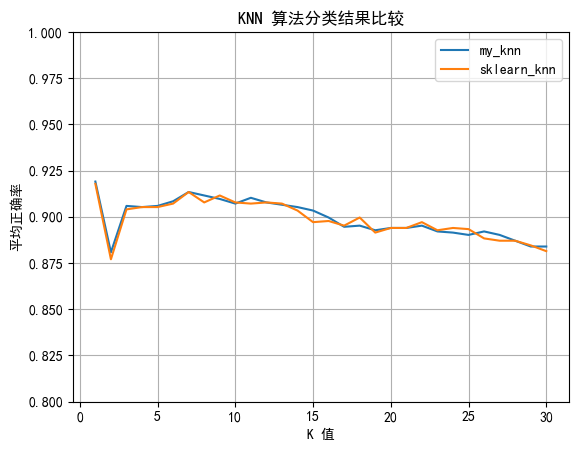

In [20]:
# 在此可视化结果并与机器学习库的结果进行对比
plt.plot(k_values, my_accuracies, label="my_knn")
plt.plot(k_values, sklearn_accuracies, label="sklearn_knn")
plt.title('KNN 算法分类结果比较')
plt.xlabel('K 值')
plt.ylabel('平均正确率')
plt.ylim(0.8,1) # 将y值限定在0.8--1，以较好地观察结果
plt.legend()
plt.grid(True)
plt.show()

由上述结果图可知，本人实现的knn算法与sklearn中的knn算法预测准确率基本一致甚至略高，证明了本人实现的knn算法的正确性。

另外，本人实现的knn算法运行时间为2min 31.2s，而sklearn中的knn算法运行时间为28min 21.8s，要远慢于本人实现版本。

此外还可以看出，当k=1时具有最佳的预测准确性。

## 提⾼要求

采用旋转等手段对原始数据进行处理，扩增数据量，采用CNN或其他深度学习方法实现手写体识别

### 数据预处理

使用旋转、平移、缩放等手段进行数据增强

In [11]:
import random
def rotate_image(image, rotate_range):
    size = image.shape[0] # 得到图像大小
    random_float = random.uniform(-rotate_range, rotate_range) # 随机旋转某个角度
    angle_rad = np.deg2rad(random_float) # 将角度转换为弧度
    rotated_image = np.zeros((size, size)) # 创建新的16x16图像
    center = (size - 1) / 2
    # 执行图像旋转
    for x in range(size):
        for y in range(size):
            # 计算旋转前的坐标
            x_original = (x - center) * np.cos(angle_rad) - (y - center) * np.sin(angle_rad) + center
            y_original = (x - center) * np.sin(angle_rad) + (y - center) * np.cos(angle_rad) + center
            # 双线性插值
            if 0 <= x_original < size - 1 and 0 <= y_original < size - 1:
                x1, y1 = int(np.floor(x_original)), int(np.floor(y_original))
                x2, y2 = x1 + 1, y1 + 1
                dx, dy = x_original - x1, y_original - y1
                rotated_image[x, y] = (1 - dx) * (1 - dy) * image[x1, y1] + dx * (1 - dy) * image[x1, y2] + \
                                      (1 - dx) * dy * image[x2, y1] + dx * dy * image[x2, y2]
    return np.where(rotated_image >= 0.5, 1, 0)

# 图像平移函数
def translate_image(image, translate_range):
    size = image.shape[0]  # 得到图像大小
    shift_x = random.randint(-translate_range, translate_range)
    shift_y = random.randint(-translate_range, translate_range)
    # 创建新的16x16图像
    translated_image = np.zeros((size, size))
    # 执行图像平移
    for x in range(size):
        for y in range(size):
            x_new = x + shift_x
            y_new = y + shift_y
            # 边界检查
            if 0 <= x_new < size and 0 <= y_new < size:
                translated_image[x_new, y_new] = image[x, y]

    return translated_image

# 图像缩放函数
def scale_image(image, scale_range):
    size = image.shape[0]  # 得到图像大小
    # 创建新的16x16图像
    scaled_image = np.zeros((size, size))
    random_scale = random.uniform(1-scale_range, 1+scale_range)  # 随机旋转某个角度
    # 执行图像缩放
    for x in range(size):
        for y in range(size):
            # 计算缩放前的坐标
            x_original = x / random_scale
            y_original = y / random_scale

            # 双线性插值
            if 0 <= x_original < size - 1 and 0 <= y_original < size - 1:
                x1, y1 = int(np.floor(x_original)), int(np.floor(y_original))
                x2, y2 = x1 + 1, y1 + 1
                dx, dy = x_original - x1, y_original - y1
                scaled_image[x, y] = (1 - dx) * (1 - dy) * image[x1, y1] + dx * (1 - dy) * image[x1, y2] + \
                                      (1 - dx) * dy * image[x2, y1] + dx * dy * image[x2, y2]
    return np.where(scaled_image >= 0.5, 1, 0)

改变数据格式

In [9]:
features = features.reshape(-1,1,16,16)  # 提取特征，并reshape成[N, C, H, W]
labels = labels.flatten()  # 提取标签，并将one-hot编码转为0-9类别

验证数据增强的功能

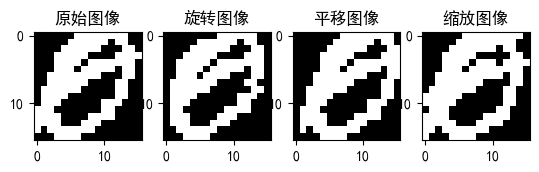

In [17]:
# 验证图像增强的功能
image=features[0].reshape((16,16)) # 示例图像
rotated_image = rotate_image(image, 10) # 旋转图像
translated_image = translate_image(image, 2) # 平移图像
scaled_image = scale_image(image, 0.1) # 缩放图像
# 显示原始图像
plt.subplot(141)
plt.imshow(image, cmap='gray')
plt.title('原始图像')
# 显示旋转图像
plt.subplot(142)
plt.imshow(rotated_image, cmap='gray')
plt.title('旋转图像')
# 显示平移图像
plt.subplot(143)
plt.imshow(translated_image, cmap='gray')
plt.title('平移图像')
# 显示缩放图像
plt.subplot(144)
plt.imshow(scaled_image, cmap='gray')
plt.title('缩放图像')
# 显示图像
plt.show()

对原始数据进行数据增强，通过不断随机选取原始图像并随机修改实现

In [18]:
# 数据增强
def data_enhance(features, labels, rate, args):
    n = features.shape[0]
    func_list = [rotate_image, translate_image, scale_image]

    for i in range(3):
        for _ in range(int(n * rate[i])):
            random_index = np.random.randint(0, n)
            # 获取随机抽取的图像数据
            random_feature = features[random_index, 0]
            # 使用 func() 处理数据
            processed_feature = func_list[i](random_feature, args[i])
            # 将处理后的数据添加到新数据中
            features = np.vstack((features, processed_feature.reshape(1, 1, 16, 16)))
            labels = np.append(labels, labels[random_index])

    return features, labels

执行数据增强

In [19]:
features, labels = data_enhance(features, labels, [1, 1, 1], [5, 2, 0.1])
print(features.shape)

(6372, 1, 16, 16)


### 搭建CNN网络

导入深度学习库

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.optim.lr_scheduler as lr_scheduler
from tqdm import tqdm

定义超参数

In [51]:
EPOCH = 70
BATCH_SIZE = 512
TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15
LR = 0.001

定义 CNN 模型

In [52]:
# 定义 CNN 模型
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, self.num_classes)  # 假设 num_classes 是类别的数量

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # 展平特征
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

划分数据集

In [53]:
# 划分数据集（训练集、验证集、测试集）
total_samples = len(features)

train_size = int(total_samples * TRAIN_RATIO)
val_size = int(total_samples * VAL_RATIO)
test_size = total_samples - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    TensorDataset(torch.Tensor(features), torch.Tensor(labels).long()),
    [train_size, val_size, test_size])

# 定义数据加载器
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

创建模型，定义损失函数和优化器，并设置当loss两轮不下降时，将学习率变为原来的0.5倍

In [54]:
# 创建模型实例
model = CNNModel(10)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# 定义一个 ReduceLROnPlateau 学习率调度器
lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

### 训练及预测

训练模型，并在验证集上评估模型

In [55]:
# 训练模型，并保存历史数据
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(EPOCH):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_data, batch_labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{EPOCH}', leave=False):
        optimizer.zero_grad()
        outputs = model(batch_data)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += batch_labels.size(0)
        correct_train += (predicted == batch_labels).sum().item()

    # 2.对学习率进行更新    
    lr_scheduler.step(running_train_loss)

    train_loss = running_train_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_loss_history.append(train_loss)
    train_acc_history.append(train_accuracy)

    # 在验证集上评估模型
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for batch_data, batch_labels in val_loader:
            outputs = model(batch_data)
            loss = criterion(outputs, batch_labels)
            running_val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += batch_labels.size(0)
            correct_val += (predicted == batch_labels).sum().item()

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct_val / total_val
    val_loss_history.append(val_loss)
    val_acc_history.append(val_accuracy)

    print(f'Epoch {epoch + 1}/{EPOCH}, '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2%}, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2%}')

Epoch 1/70, Train Loss: 1.9199, Train Accuracy: 48.63%, Validation Loss: 1.4623, Validation Accuracy: 71.10%


Epoch 2/70, Train Loss: 1.1465, Train Accuracy: 73.79%, Validation Loss: 0.9317, Validation Accuracy: 74.87%


Epoch 3/70, Train Loss: 0.7571, Train Accuracy: 78.09%, Validation Loss: 0.7165, Validation Accuracy: 78.32%


Epoch 4/70, Train Loss: 0.5948, Train Accuracy: 81.52%, Validation Loss: 0.6092, Validation Accuracy: 81.26%


Epoch 5/70, Train Loss: 0.5021, Train Accuracy: 84.73%, Validation Loss: 0.5526, Validation Accuracy: 83.14%


Epoch 6/70, Train Loss: 0.4445, Train Accuracy: 86.93%, Validation Loss: 0.5159, Validation Accuracy: 84.82%


Epoch 7/70, Train Loss: 0.3955, Train Accuracy: 88.57%, Validation Loss: 0.4548, Validation Accuracy: 86.60%


Epoch 8/70, Train Loss: 0.3548, Train Accuracy: 90.07%, Validation Loss: 0.4201, Validation Accuracy: 87.43%


Epoch 9/70, Train Loss: 0.3169, Train Accuracy: 91.14%, Validation Loss: 0.3977, Validation Accuracy: 88.27%


Epoch 10/70, Train Loss: 0.2856, Train Accuracy: 92.09%, Validation Loss: 0.3817, Validation Accuracy: 88.27%


Epoch 11/70, Train Loss: 0.2570, Train Accuracy: 92.87%, Validation Loss: 0.3494, Validation Accuracy: 90.05%


Epoch 12/70, Train Loss: 0.2324, Train Accuracy: 93.52%, Validation Loss: 0.3243, Validation Accuracy: 90.47%


Epoch 13/70, Train Loss: 0.2116, Train Accuracy: 94.13%, Validation Loss: 0.3128, Validation Accuracy: 90.58%


Epoch 14/70, Train Loss: 0.1904, Train Accuracy: 94.93%, Validation Loss: 0.2890, Validation Accuracy: 90.68%


Epoch 15/70, Train Loss: 0.1670, Train Accuracy: 95.43%, Validation Loss: 0.2715, Validation Accuracy: 92.15%


Epoch 16/70, Train Loss: 0.1524, Train Accuracy: 95.99%, Validation Loss: 0.2577, Validation Accuracy: 92.25%


Epoch 17/70, Train Loss: 0.1394, Train Accuracy: 96.43%, Validation Loss: 0.2557, Validation Accuracy: 92.46%


Epoch 18/70, Train Loss: 0.1298, Train Accuracy: 96.46%, Validation Loss: 0.2387, Validation Accuracy: 93.19%


Epoch 19/70, Train Loss: 0.1195, Train Accuracy: 97.00%, Validation Loss: 0.2326, Validation Accuracy: 92.88%


Epoch 20/70, Train Loss: 0.1080, Train Accuracy: 97.47%, Validation Loss: 0.2275, Validation Accuracy: 93.40%


Epoch 21/70, Train Loss: 0.0962, Train Accuracy: 97.67%, Validation Loss: 0.2154, Validation Accuracy: 93.93%


Epoch 22/70, Train Loss: 0.0843, Train Accuracy: 98.09%, Validation Loss: 0.2068, Validation Accuracy: 94.14%


Epoch 23/70, Train Loss: 0.0769, Train Accuracy: 98.34%, Validation Loss: 0.2019, Validation Accuracy: 94.35%


Epoch 24/70, Train Loss: 0.0714, Train Accuracy: 98.70%, Validation Loss: 0.1953, Validation Accuracy: 94.55%


Epoch 25/70, Train Loss: 0.0655, Train Accuracy: 98.97%, Validation Loss: 0.2093, Validation Accuracy: 93.82%


Epoch 26/70, Train Loss: 0.0582, Train Accuracy: 99.22%, Validation Loss: 0.1899, Validation Accuracy: 94.45%


Epoch 27/70, Train Loss: 0.0527, Train Accuracy: 99.33%, Validation Loss: 0.1909, Validation Accuracy: 95.08%


Epoch 28/70, Train Loss: 0.0489, Train Accuracy: 99.39%, Validation Loss: 0.1790, Validation Accuracy: 94.97%


Epoch 29/70, Train Loss: 0.0441, Train Accuracy: 99.51%, Validation Loss: 0.1799, Validation Accuracy: 95.18%


Epoch 30/70, Train Loss: 0.0412, Train Accuracy: 99.66%, Validation Loss: 0.1834, Validation Accuracy: 94.97%


Epoch 31/70, Train Loss: 0.0375, Train Accuracy: 99.71%, Validation Loss: 0.1832, Validation Accuracy: 95.39%


Epoch 32/70, Train Loss: 0.0353, Train Accuracy: 99.69%, Validation Loss: 0.1778, Validation Accuracy: 94.97%


Epoch 33/70, Train Loss: 0.0320, Train Accuracy: 99.80%, Validation Loss: 0.1761, Validation Accuracy: 95.18%


Epoch 34/70, Train Loss: 0.0291, Train Accuracy: 99.78%, Validation Loss: 0.1783, Validation Accuracy: 94.87%


Epoch 35/70, Train Loss: 0.0265, Train Accuracy: 99.91%, Validation Loss: 0.1750, Validation Accuracy: 95.39%


Epoch 36/70, Train Loss: 0.0253, Train Accuracy: 99.91%, Validation Loss: 0.1716, Validation Accuracy: 95.08%


Epoch 37/70, Train Loss: 0.0240, Train Accuracy: 99.87%, Validation Loss: 0.1744, Validation Accuracy: 95.08%


Epoch 38/70, Train Loss: 0.0210, Train Accuracy: 99.96%, Validation Loss: 0.1736, Validation Accuracy: 95.60%


Epoch 39/70, Train Loss: 0.0196, Train Accuracy: 100.00%, Validation Loss: 0.1716, Validation Accuracy: 95.39%


Epoch 40/70, Train Loss: 0.0183, Train Accuracy: 99.98%, Validation Loss: 0.1717, Validation Accuracy: 95.29%


Epoch 41/70, Train Loss: 0.0170, Train Accuracy: 100.00%, Validation Loss: 0.1707, Validation Accuracy: 95.50%


Epoch 42/70, Train Loss: 0.0159, Train Accuracy: 100.00%, Validation Loss: 0.1729, Validation Accuracy: 95.60%


Epoch 43/70, Train Loss: 0.0153, Train Accuracy: 99.98%, Validation Loss: 0.1749, Validation Accuracy: 95.39%


Epoch 44/70, Train Loss: 0.0145, Train Accuracy: 100.00%, Validation Loss: 0.1731, Validation Accuracy: 95.39%


Epoch 45/70, Train Loss: 0.0135, Train Accuracy: 100.00%, Validation Loss: 0.1701, Validation Accuracy: 95.60%


Epoch 46/70, Train Loss: 0.0129, Train Accuracy: 100.00%, Validation Loss: 0.1749, Validation Accuracy: 95.29%


Epoch 47/70, Train Loss: 0.0116, Train Accuracy: 100.00%, Validation Loss: 0.1724, Validation Accuracy: 95.50%


Epoch 48/70, Train Loss: 0.0109, Train Accuracy: 100.00%, Validation Loss: 0.1718, Validation Accuracy: 95.39%


Epoch 49/70, Train Loss: 0.0105, Train Accuracy: 100.00%, Validation Loss: 0.1755, Validation Accuracy: 95.18%


Epoch 50/70, Train Loss: 0.0100, Train Accuracy: 100.00%, Validation Loss: 0.1715, Validation Accuracy: 95.81%


Epoch 51/70, Train Loss: 0.0093, Train Accuracy: 100.00%, Validation Loss: 0.1731, Validation Accuracy: 95.29%


Epoch 52/70, Train Loss: 0.0088, Train Accuracy: 100.00%, Validation Loss: 0.1743, Validation Accuracy: 95.39%


Epoch 53/70, Train Loss: 0.0084, Train Accuracy: 100.00%, Validation Loss: 0.1717, Validation Accuracy: 95.39%


Epoch 54/70, Train Loss: 0.0080, Train Accuracy: 100.00%, Validation Loss: 0.1740, Validation Accuracy: 95.50%


Epoch 55/70, Train Loss: 0.0077, Train Accuracy: 100.00%, Validation Loss: 0.1760, Validation Accuracy: 95.29%


Epoch 56/70, Train Loss: 0.0073, Train Accuracy: 100.00%, Validation Loss: 0.1721, Validation Accuracy: 95.60%


Epoch 57/70, Train Loss: 0.0069, Train Accuracy: 100.00%, Validation Loss: 0.1760, Validation Accuracy: 95.39%


Epoch 58/70, Train Loss: 0.0067, Train Accuracy: 100.00%, Validation Loss: 0.1757, Validation Accuracy: 95.39%


Epoch 59/70, Train Loss: 0.0064, Train Accuracy: 100.00%, Validation Loss: 0.1754, Validation Accuracy: 95.50%


Epoch 60/70, Train Loss: 0.0060, Train Accuracy: 100.00%, Validation Loss: 0.1765, Validation Accuracy: 95.29%


Epoch 61/70, Train Loss: 0.0057, Train Accuracy: 100.00%, Validation Loss: 0.1755, Validation Accuracy: 95.50%


Epoch 62/70, Train Loss: 0.0055, Train Accuracy: 100.00%, Validation Loss: 0.1748, Validation Accuracy: 95.50%


Epoch 63/70, Train Loss: 0.0053, Train Accuracy: 100.00%, Validation Loss: 0.1780, Validation Accuracy: 95.50%


Epoch 64/70, Train Loss: 0.0051, Train Accuracy: 100.00%, Validation Loss: 0.1755, Validation Accuracy: 95.50%


Epoch 65/70, Train Loss: 0.0050, Train Accuracy: 100.00%, Validation Loss: 0.1778, Validation Accuracy: 95.50%


Epoch 66/70, Train Loss: 0.0048, Train Accuracy: 100.00%, Validation Loss: 0.1776, Validation Accuracy: 95.71%


Epoch 67/70, Train Loss: 0.0046, Train Accuracy: 100.00%, Validation Loss: 0.1773, Validation Accuracy: 95.60%


Epoch 68/70, Train Loss: 0.0044, Train Accuracy: 100.00%, Validation Loss: 0.1796, Validation Accuracy: 95.60%


Epoch 69/70, Train Loss: 0.0043, Train Accuracy: 100.00%, Validation Loss: 0.1776, Validation Accuracy: 95.39%


Epoch 70/70, Train Loss: 0.0042, Train Accuracy: 100.00%, Validation Loss: 0.1799, Validation Accuracy: 95.50%


在测试集上测试模型

In [56]:
# 在测试集上测试模型
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_data, batch_labels in test_loader:
        outputs = model(batch_data)
        _, predicted = torch.max(outputs, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

test_accuracy = correct / total
print('Test Accuracy: {:.2f}%'.format(100 * test_accuracy))

Test Accuracy: 95.30%


绘制训练曲线

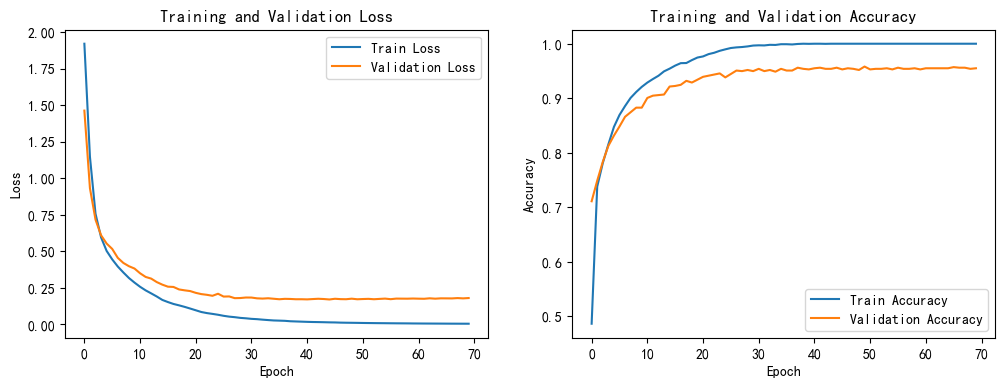

In [57]:
# 绘制训练曲线
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()

由上述实验数据可知，CNn在训练集上能达到100%的准确率，在验证集上能达到95%的准确率，而在测试集上也能达到95%的准确率，均优于KNN算法达到的90%准确率，说明CNN在处理手写字体识别等图像识别任务方面有明显的优势。

同时可以发现，验证集比训练集的准确率低了5%，说明该模型存在一定的过拟合，不过并不严重。

## 总结

本次实验中，我主要完成了如下任务：

1. 自己实现了KNN算法和k折交叉验证，并使用留一法完成了手写字体识别任务。

2. 将自己实现的KNN算法与sklearn库中的KNN分类器进行了对比，发现两者的准确率基本一致，但是本人实现的算法要远远快于sklearn库中的KNN分类器，证明本人实现算法的正确性和优越性。

3. 使用旋转、平移、缩放的方法对原始数据进行增强，然后搭建了CNN网络，并通过训练集、测试集、验证集的分类效果说明了CNN算法在图像识别任务方面的优势。